In [1]:
import matplotlib.pyplot as plt
import numpy as np
path =  "/content/drive/MyDrive/Colab Notebooks/midterm-assignment/"

#Problem1
We consider a binary classification with a linear logistic regression. Let x ∈ Rd, and w ∈ Rd be an d-dimensional input vector, and a parameter of the model, respectively. The classifier is represented by f(x) = 2[[w⊤x > 0]] − 1, where [[c]] denotes an indicator function that returns 1 if c is true, otherwise returns 0. With the supervised dataset {xi, yi}ni=1, we consider an optimization problem for the logistic regression. The optimization problem can be written as
```
w^=argminw J(w)
J(w):=sum(ln1+exp)-yiw⊤Xi)))+lw⊤w
```
Here we assume that xi contains constant value 1 to make the classifier adaptable to offset in d − 1 dimensional feature space. With some artificial dataset (see Toy Dataset section, Dataset IV), we consider to implement some optimization methods in the following way.

1. Implement batch steepest gradient method

In [2]:
#Dataset4
np.random.seed(seed=0)
n = 200
x = 3 * (np.random.rand(n,4) - 0.5)
y = (2 * x[:,0] - 1 * x[:,1] + 0.5 + 0.5 * np.random.rand(n)) > 0
y = 2 * y - 1

(200, 4) (200,)


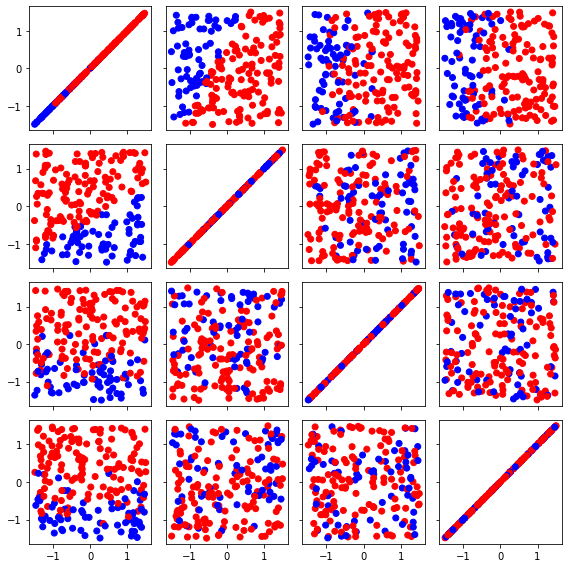

In [3]:
print(x.shape,y.shape)

fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y>0,"r","b"))
plt.tight_layout()
plt.savefig(path+"1-0.png")
plt.show()

In [4]:
def J(w,x,y):
    ret = sum([np.log(1+np.exp(-y[i]*w.T@x[i,:])) for i in range(n)])
    ret += l * w.T @ w
    return ret
    
def dJ(w,x,y):
    ret = sum([np.exp(-y[i]*w.T@x[i,:]) * (-y[i]*x[i,:]) / (1+np.exp(-y[i]*w.T@x[i,:])) for i in range(n)])
    ret += 2 * l * w
    return ret

def steepest_gradient_method(x,y,w,e=1e-9):
    loop = 1
    while 1:
        w_new = w - a/loop*dJ(w,x,y)
        print("\rloop:",loop,"e:",abs(J(w,x,y)-J(w_new,x,y)),end="")
        if abs(J(w,x,y)-J(w_new,x,y)) < e:
            print()
            break
        w = w_new
        loop += 1
    return w

In [5]:
w = np.zeros(4)

l = 1
a = 1

w = steepest_gradient_method(x,y,w)

loop: 49 e: 8.384546390516334e-10


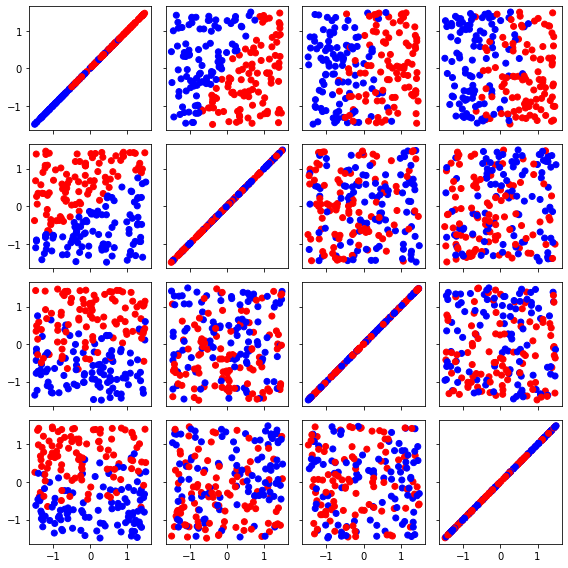

In [6]:
y_hat = (2*(x@w.reshape((-1,1))>=0)-1).ravel()

fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y_hat>0,"r","b"))
plt.tight_layout()
plt.savefig(path+"1-1-1.png")
plt.show()

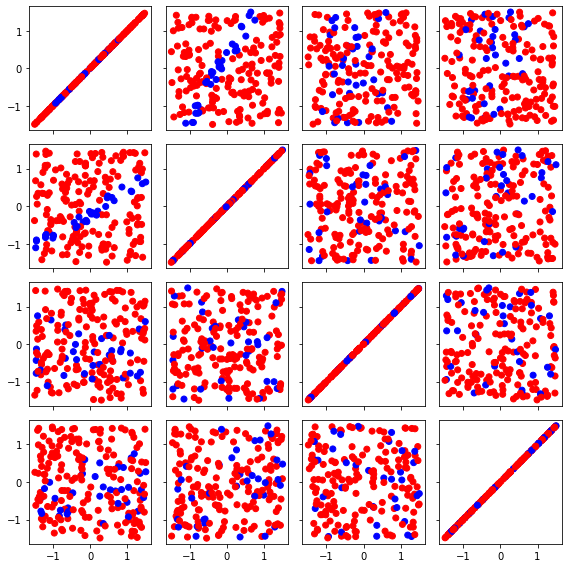

In [7]:
fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y_hat*y>0,"r","b"))
plt.tight_layout()
plt.savefig(path+"1-1-2.png")
plt.show()

2. Implement Newton based method.

In [8]:
def d2J(w,x,y):
    ret = 0
    for i in range(n):
        xi = x[i].reshape((1,-1))
        ret += np.exp(-y[i]*w.T@x[i,:])/(1+np.exp(-y[i]*w.T@x[i,:]))**2*xi.T@xi
    ret += 2 * l * np.identity(4)
    return ret

def newton(x,y,w,e=1e-9):
    loop = 1
    while 1:
        w_new = w - np.linalg.inv(d2J(w,x,y))@dJ(w,x,y)
        print("\rloop:",loop,"e:",abs(J(w,x,y)-J(w_new,x,y)),end="")
        if abs(J(w,x,y)-J(w_new,x,y)) < e:
            print()
            break
        w = w_new
        loop += 1
    return w

In [9]:
w = np.zeros(4)

l = 1
a = 1

w = newton(x,y,w)

loop: 6 e: 0.0


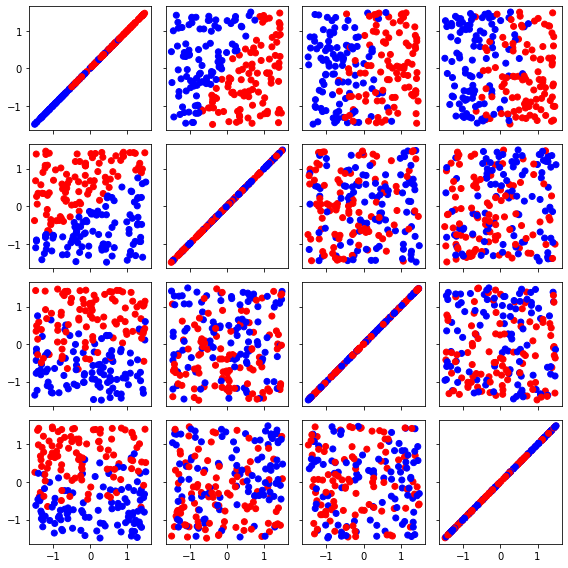

In [10]:
y_hat = (2*(x@w.reshape((-1,1))>=0)-1).ravel()

fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y_hat>0,"r","b"))
plt.tight_layout()
plt.savefig(path+"1-2-1.png")
plt.show()

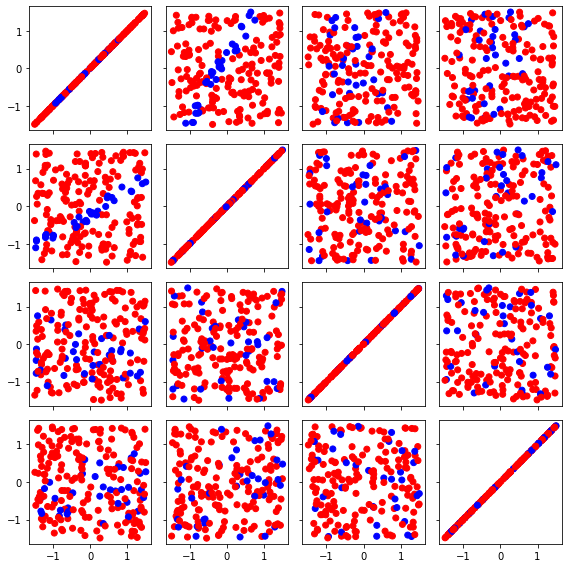

In [11]:
fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y_hat*y>0,"r","b"))
plt.tight_layout()
plt.savefig(path+"1-2-2.png")
plt.show()

3. Compare the performance of the above two optimization methods by showing |J(w(t)) − J(wˆ)| w.r.t. t, where w(t) represents the parameter at t-th iteration, and wˆ represent optimal parameter that reaches minimum of J obtained by (either of) the two methods, in semi-log plot.

In [12]:
t = 50

Jw1 = np.zeros(t,dtype=np.float128)
Jw2 = np.zeros(t,dtype=np.float128)

w0 = np.zeros(4,dtype=np.float128)

l = 1
a = 0.5

w = w0
for i in range(t):
    Jw1[i]=J(w,x,y)
    w = w - a/(i+1)*dJ(w,x,y)
Jw1_hat = Jw1[-1]

w = w0
for i in range(t):
    Jw2[i]=J(w,x,y)
    w = w - a*np.linalg.inv(d2J(w,x,y))@dJ(w,x,y)
Jw2_hat = Jw2[-1]

Jw_hat = min(min(Jw1),min(Jw2))

In [13]:
display(Jw_hat)
(Jw2-Jw_hat)

71.2544922342519163

array([6.73749439e+01, 2.76117602e+01, 1.23922687e+01, 5.14299912e+00,
       1.88896281e+00, 6.11949862e-01, 1.79030962e-01, 4.88798470e-02,
       1.28068179e-02, 3.28027153e-03, 8.30241442e-04, 2.08855018e-04,
       5.23770520e-05, 1.31147677e-05, 3.28126083e-06, 8.20636684e-07,
       2.05199379e-07, 5.13048720e-08, 1.28268465e-08, 3.20679023e-09,
       8.01707402e-10, 2.00428091e-10, 5.01071823e-11, 1.25268337e-11,
       3.13172405e-12, 7.82936216e-13, 1.95760075e-13, 4.89538965e-14,
       1.22610255e-14, 3.07393000e-15, 7.97972799e-16, 2.01227923e-16,
       6.24500451e-17, 2.77555756e-17, 3.46944695e-17, 4.85722573e-17,
       4.85722573e-17, 2.08166817e-17, 0.00000000e+00, 3.46944695e-17,
       3.46944695e-17, 2.08166817e-17, 2.08166817e-17, 1.38777878e-17,
       2.77555756e-17, 2.77555756e-17, 3.46944695e-17, 3.46944695e-17,
       2.08166817e-17, 3.46944695e-17], dtype=float128)

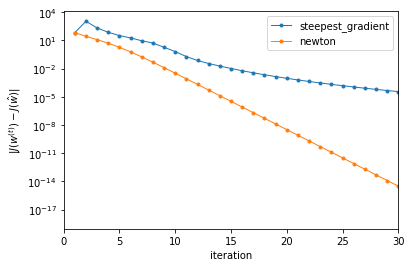

In [27]:
plt.plot(range(1,t+1),abs(Jw1-Jw_hat+1e-18),linewidth=1,marker=".",label="steepest_gradient")
plt.plot(range(1,t+1),abs(Jw2-Jw_hat+1e-18),linewidth=1,marker=".",label="newton")
plt.xlabel("iteration")
plt.ylabel("$|J(w^{(t)})-J(\hat{w})|$")
plt.yscale('log')
plt.xlim((0,30))

plt.legend()
plt.savefig(path+"1-3.png")
plt.show()

4. Implement Newton method and simple steepest gradient method for multiclass version of logistic regression (use Toy dataset V) and run the same experiment as binary logistic regression mentioned above.

In [15]:
#Dataset5
n = 200
x = 3 * (np.random.rand(n,4) - 0.5)
W = [[ 2, -1,0.5],
     [-3,  2,  1],
     [ 1,  2,  3]]
W = np.array(W)

tmp = np.hstack([x[:,:2],np.ones((n,1))])@W.T + 0.5 * np.random.randn(n,3)
maxlogit = np.amax(tmp,axis=1)
y = np.argmax(tmp,axis=1)

(200, 4) (200,)


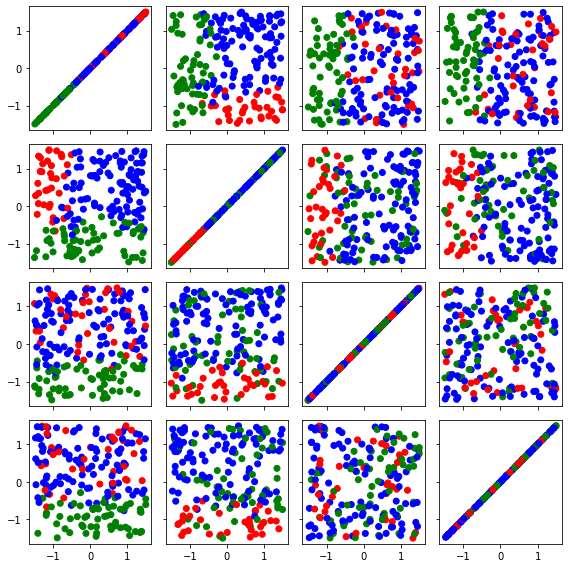

In [16]:
print(x.shape,y.shape)

fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
colors = [["r","g","b"][i] for i in y]
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=colors)
plt.tight_layout()
plt.savefig(path+"1-4-0.png")
plt.show()

In [17]:
a = 1
y0 = np.where(y==0, 1, -1)
y1 = np.where(y==1, 1, -1)
y2 = np.where(y==2, 1, -1)
w = np.zeros((3,4))
w[0,:] = steepest_gradient_method(x,y0,w[0,:])
w[1,:] = steepest_gradient_method(x,y1,w[1,:])
w[2,:] = steepest_gradient_method(x,y2,w[2,:])

loop: 35 e: 5.546212378249038e-10
loop: 28 e: 8.381562111026142e-10
loop: 31 e: 3.72992303709907e-10


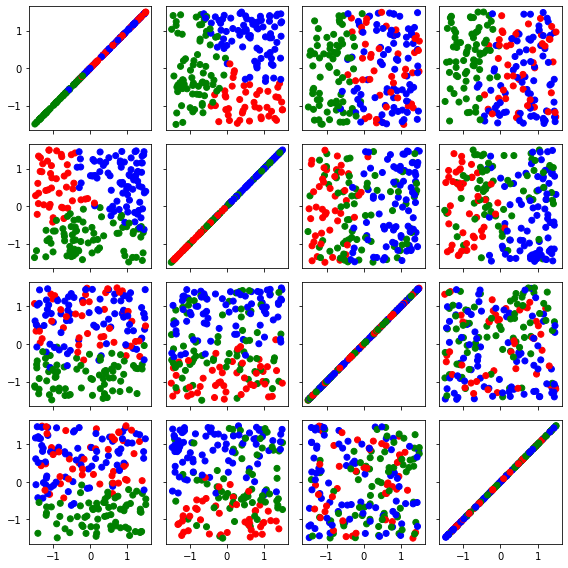

In [18]:
y_hat = np.argmax(x@w.T,axis=1)
colors = [["r","g","b"][i] for i in y_hat]

fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=colors)
plt.tight_layout()
plt.savefig(path+"1-4-1.png")
plt.show()

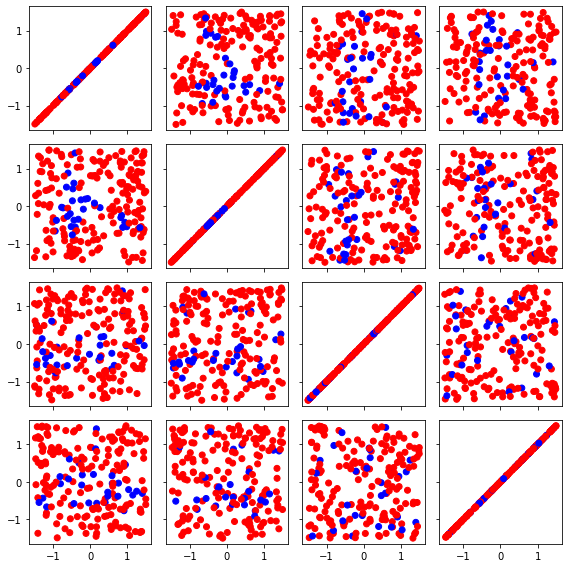

In [19]:
fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y!=y_hat,"b","r"))
plt.tight_layout()
plt.savefig(path+"1-4-2.png")
plt.show()

In [20]:
a = 1
y0 = np.where(y==0, 1, -1)
y1 = np.where(y==1, 1, -1)
y2 = np.where(y==2, 1, -1)
w = np.zeros((3,4))
w[0,:] = newton(x,y0,w[0,:])
w[1,:] = newton(x,y1,w[1,:])
w[2,:] = newton(x,y2,w[2,:])

loop: 5 e: 2.8421709430404007e-13
loop: 6 e: 1.4210854715202004e-14
loop: 6 e: 2.842170943040401e-14


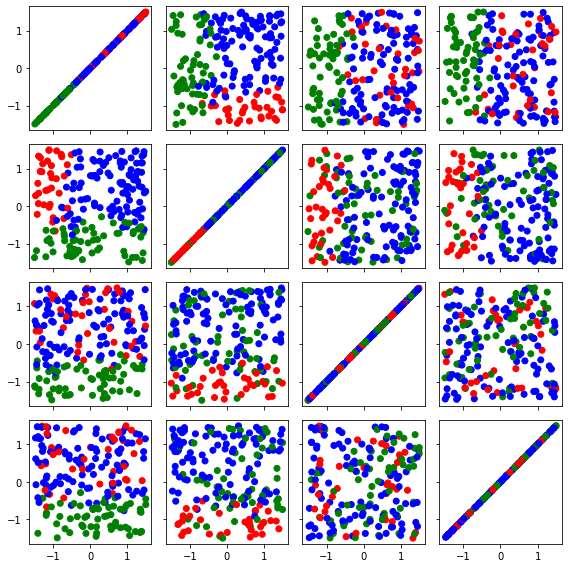

In [21]:
y_hat = np.argmax(x@w.T,axis=1)
colors = [["r","g","b"][i] for i in y]

fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=colors)
plt.tight_layout()
plt.savefig(path+"1-4-3.png")
plt.show()

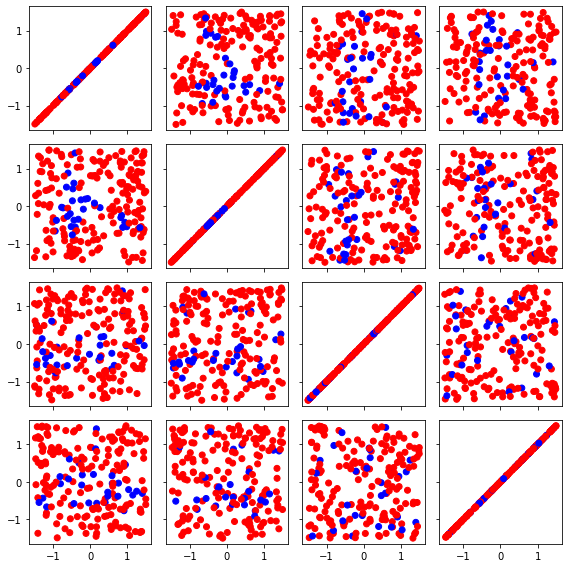

In [22]:
fig,axs = plt.subplots(4,4,figsize=(8,8),sharex=True,sharey=True)
for i in range(4):
    for j in range(4):
        axs[i,j].scatter(x[:,i],x[:,j],color=np.where(y!=y_hat,"b","r"))
plt.tight_layout()
plt.savefig(path+"1-4-4.png")
plt.show()